<img src="https://relevance.ai/wp-content/uploads/2021/11/logo.79f303e-1.svg" width="150" alt="Relevance AI" />
<h5> Developer-first vector platform for ML teams </h5>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RelevanceAI/workflows/blob/main/workflows/subclustering/core_subclustering.ipynb)

# Instructions

1. Paste the token copied to your clipboard provided from the 'SubCluster' Workflow dashboard.
2. Click the ▶️  on the left or go to "Runtime" -> "Run All" and click "Run anyway" on the warning that pops up.
3. You should see a progress bar underneath the form, keep this window opened and active until the progress bar is complete otherwise it'll terminate.

Note: 
- For fastest clustering speed make sure to go to "Runtime" -> "Change runtime type" and enable "Hardware accelerator" as "GPU".


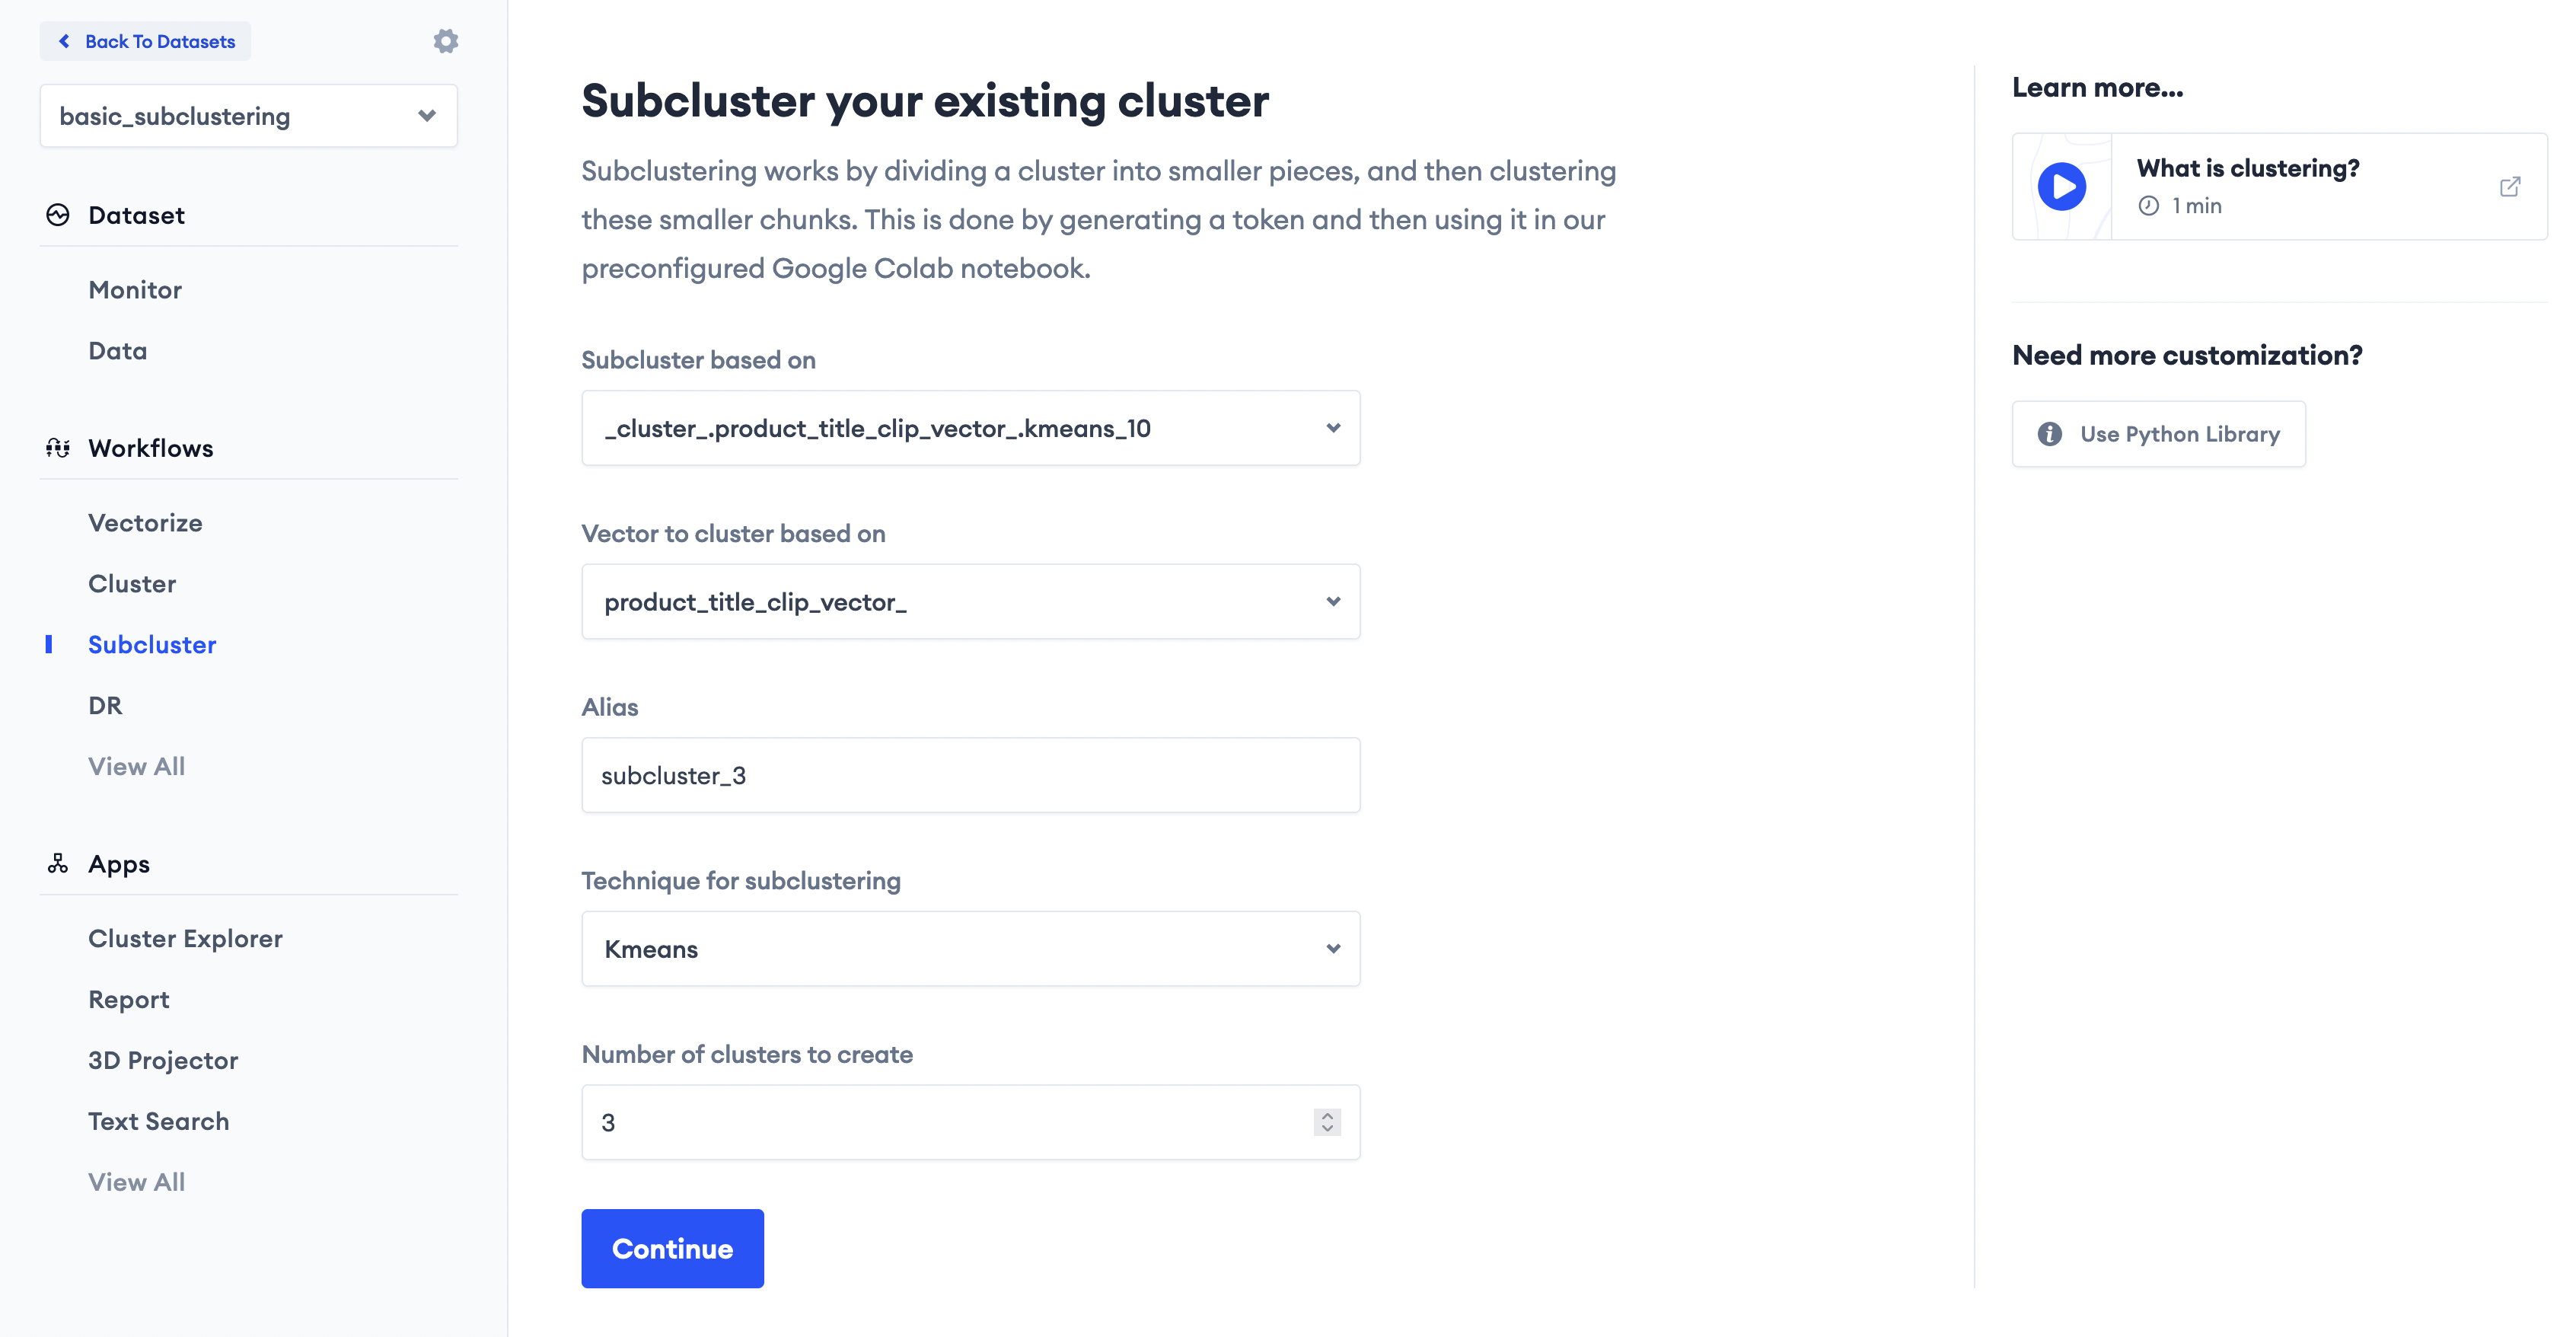

In [ ]:
#@title Paste token below and press ▶️  button to the left of this title { display-mode: "form" }
# %tb

import base64
import json
token = "eyJkYXRhc2V0X2lkIjoiYmFzaWNfc3ViY2x1c3RlcmluZyIsIm5fY2x1c3RlcnMiOjMsInZlY3Rvcl9maWVsZCI6InByb2R1Y3RfdGl0bGVfY2xpcF92ZWN0b3JfIiwicGFyZW50X2ZpZWxkIjoiX2NsdXN0ZXJfLnByb2R1Y3RfdGl0bGVfY2xpcF92ZWN0b3JfLmttZWFuc18xMCIsInRocmVzaG9sZCI6MC43NSwiY2x1c3RlcmluZ1R5cGUiOiJrbWVhbnMiLCJyZWdpb24iOiJhcC1zb3V0aGVhc3QtMiIsInByb2plY3QiOiIyMmQ4YjQ3ZmJlZDZjZjEzOTFmMCIsImFwaV9rZXkiOiJURmRpZFZWdU9FSnJUVlJTYTBaSVdGazBPRms2YVhWc1FXTndaV0pTYnkxMldrOVJOVTUxY0dKRVVRIiwiYXV0aG9yaXphdGlvblRva2VuIjoiMjJkOGI0N2ZiZWQ2Y2YxMzkxZjA6VEZkaWRWVnVPRUpyVFZSU2EwWklXRmswT0ZrNmFYVnNRV053WldKU2J5MTJXazlSTlU1MWNHSkVVUTphcC1zb3V0aGVhc3QtMjpnVnBia1lFOXdxZ2lreVhCU1hQSXlERGJHYWsxIiwiYWxpYXMiOiJfY2x1c3Rlcl8ucHJvZHVjdF90aXRsZV9jbGlwX3ZlY3Rvcl8ua21lYW5zXzEwLnN1YmNsdXN0ZXJfMyJ9" #@param {type:"string"}

show_warnings_in_logs = False #@param {type:"boolean"}
#@markdown Once the form is filled and you've clicked run, monitor below for logs of it running

config = json.loads(base64.b64decode(token + "==="))

# print(json.dumps(config, indent=2))

!pip install -q RelevanceAI==2.1.4
!pip install -q sentence-transformers==2.2.0
from relevanceai import Client
client = Client(token=config['authorizationToken'])

dataset_id = config['dataset_id']  ## Change this to your own dataset
n_clusters = config['n_clusters'] # number of clusters you want
vector_field = config['vector_field']  # vector field
parent_field = config['parent_field'] # what to base clusters on
alias = config['alias'] # What you want to call these clusters
cluster_method = config['clusteringType']
ds = client.Dataset(dataset_id)

try:
  if cluster_method == "community-detection":
      cluster_method = "community_detection"
      !pip install -q sentence-transformers==2.2.0
      ds.subcluster(
          model=cluster_method,
          cluster_config={"threshold": config['threshold']},
          vector_fields=[vector_field],
          parent_field=parent_field,
          alias=alias
      )
  elif cluster_method == "kmeans":
      from sklearn.cluster import KMeans
      model = KMeans(n_clusters=n_clusters)
      ds.subcluster(
          model=model,
          parent_field=parent_field,
          vector_fields=[vector_field],
          alias=alias,
          cluster_config={"n_clusters": config['n_clusters']}
      )
except Exception as e:
    print(e)
    raise ValueError(f'Incorrect token provided. {json.dumps(config, indent=2)}')

print("Finished subclustering your data.")